<a href="https://colab.research.google.com/github/nishantkumar1308/Cryptographic-Key-Generation/blob/main/Image_encryption_using_henon_and_arnold_cat_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is chaos?**


`Chaotic systems are a simple sub-type of nonlinear dynamical systems. They may contain very few interacting parts and these may follow very simple rules, but these systems all have a very sensitive dependence on their initial conditions. Despite their deterministic simplicity, over time these systems can produce totally unpredictable and wildly divergent (aka, chaotic) behavior.`

**Arnold Cat map.**

Arnold's cat map is a chaotic map often used for pixel manipulation. It applies a tranform on the image that essentially shuffles the pixels by stretching anf folding thethe image. When an optimal number of iterations of the transformation is applied on the image, the resulting image becomes incomprehensible and hence encrypted.

For this implementation The transform applied on the image is: R([x,y]) = [(x + y) mod n, (x + 2y) mod n] where n is the dimensions of the image



When the transformation is repeated enough times, the original image will reappear. The number of iterations 'n' at which the original image will reappear is given by these rules of thumb: Here 'd' is the dimension of the square image:

if d = 2.(5^i) for i >=1, n = 3*d
if d = (5^i) for i >=1, n = 2*d
if d = 6.(5^i) for i>=1, n = 2*d
else n <= 12*d / 7
This periodicity forms the crux of the encryption process. Here key is the number of iterations of transformations initially applied to get the encrypted image. n - key is the number of rounds of transformations applied to get the decrypted image.

In [ ]:
from google.colab import files
uploaded = files.upload()
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import numpy as np
from math import log

TypeError: ignored

In [ ]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
    return img_arnold

In [ ]:
    def ArnoldCatEncryption(imageName, key):
     img = cv2.imread("cameraman.bmp")
     for i in range (0,key):
         img = ArnoldCatTransform(img, i)
     cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
     return img

In [ ]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread("cameraman.bmp")
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [ ]:
image = "HorizonZero"
ext = ".png"
key = 20

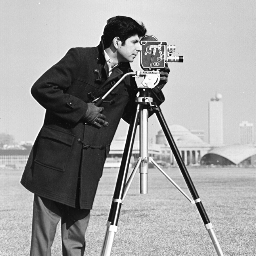

In [ ]:
img = cv2.imread("cameraman.bmp")
cv2_imshow(img)

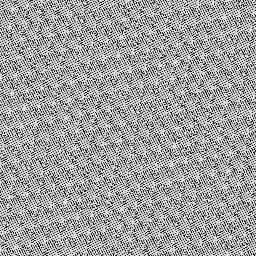

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

In [ ]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

KeyboardInterrupt: ignored

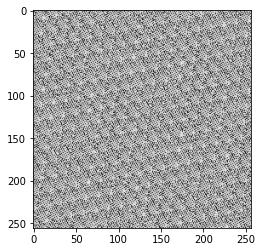

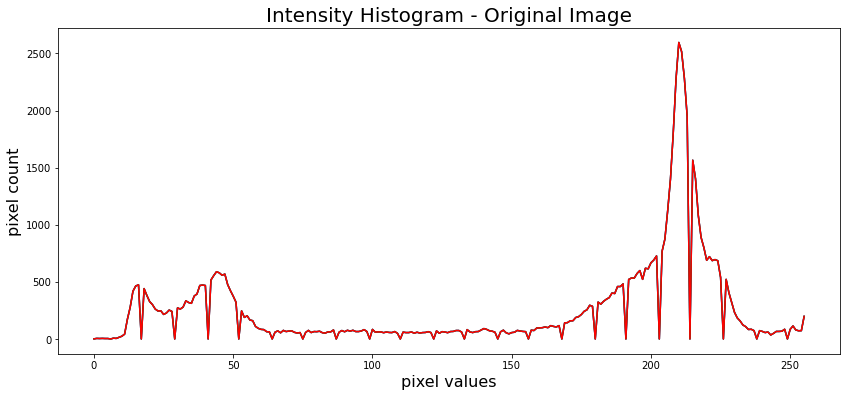

In [ ]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

NameError: ignored